# COVID-19 Data Analysis
- Data is provided Johns Hopkins University <a href='https://github.com/CSSEGISandData/COVID-19'>here</a>

In [1]:
# Import libraries

import shutil
import os
import stat
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import folium

%matplotlib inline

In [2]:
# Declare important variables
raw_data_path = 'raw_data/'
confirmed_data_path = raw_data_path + 'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_data_path = raw_data_path + 'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_data_path = raw_data_path + 'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [3]:
# Run this cell to get latest data

# def handle_remove_readonly(func, path, exc):
#     if not os.access(path, os.W_OK):
#         # Is the error an access error ?
#         os.chmod(path, stat.S_IWUSR)
#         func(path)
#     else:
#         raise
        
# if(os.path.exists(raw_data_path)):
#     shutil.rmtree(raw_data_path, onerror=handle_remove_readonly)
    
# !git clone https://github.com/CSSEGISandData/COVID-19.git $raw_data_path

## Data Analysis

In [4]:
# Declare dataframe
df_confirmed = pd.read_csv(confirmed_data_path)
df_death = pd.read_csv(death_data_path)
df_recovered = pd.read_csv(recovered_data_path)

In [5]:
# Covid cases distribution
map_view = folium.Map(location=[10,0], zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['Country/Region']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['Province/State']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001))))*20000,
        color='#ffaf7a',
        fill_color='#ffaf7a').add_to(map_view)

map_view

In [11]:
dates = df_confirmed.columns[4:]

Text(0.5, 0, 'Number of cases (updated: 5/11/20)')

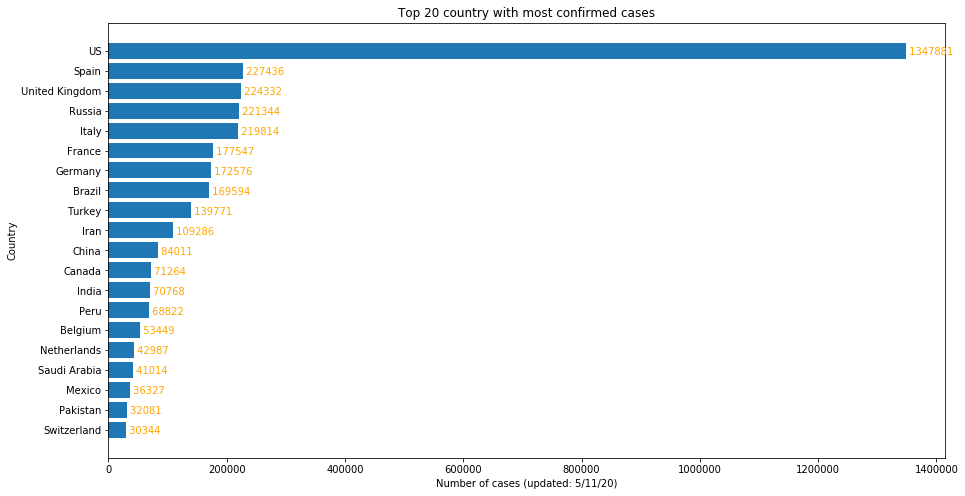

In [12]:
# Sum the amount of cases in different state group by country
df_confirmed_country = df_confirmed.groupby('Country/Region')[dates].sum().reset_index()
df_confirmed_country = df_confirmed_country.sort_values(by=df_confirmed_country.columns[-1], ascending=False)

# Plot the chart for top 20 most confirmed cases
plt.figure(figsize=(15,8))
plt.barh(df_confirmed_country[df_confirmed_country.columns[0]].iloc[:20][::-1], 
         df_confirmed_country[df_confirmed_country.columns[-1]].iloc[:20][::-1])
for i, v in enumerate(df_confirmed_country[df_confirmed_country.columns[-1]].iloc[:20][::-1]):
    plt.text(v, i-.2, ' '+str(v), color='orange')
plt.title('Top 20 country with most confirmed cases')
plt.ylabel('Country')
plt.xlabel(f'Number of cases (updated: {df_confirmed_country.columns[-1]})')

Text(0.5, 0, 'Number of cases (updated: 5/11/20)')

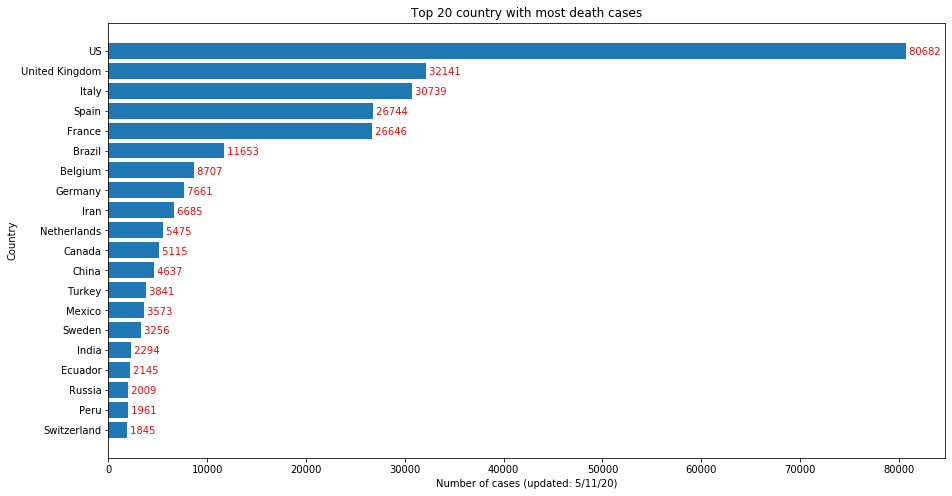

In [13]:
# Sum the amount of cases in different state group by country
df_death_country = df_death.groupby('Country/Region')[dates].sum().reset_index()
df_death_country = df_death_country.sort_values(by=df_death_country.columns[-1], ascending=False)

# Plot the chart for top 20 most death cases
plt.figure(figsize=(15,8))
plt.barh(df_death_country[df_death_country.columns[0]].iloc[:20][::-1], 
         df_death_country[df_death_country.columns[-1]].iloc[:20][::-1])
for i, v in enumerate(df_death_country[df_death_country.columns[-1]].iloc[:20][::-1]):
    plt.text(v, i-.2, ' '+str(v), color='red')
plt.title('Top 20 country with most death cases')
plt.ylabel('Country')
plt.xlabel(f'Number of cases (updated: {df_death_country.columns[-1]})')

Text(0.5, 0, 'Number of cases (updated: 5/11/20)')

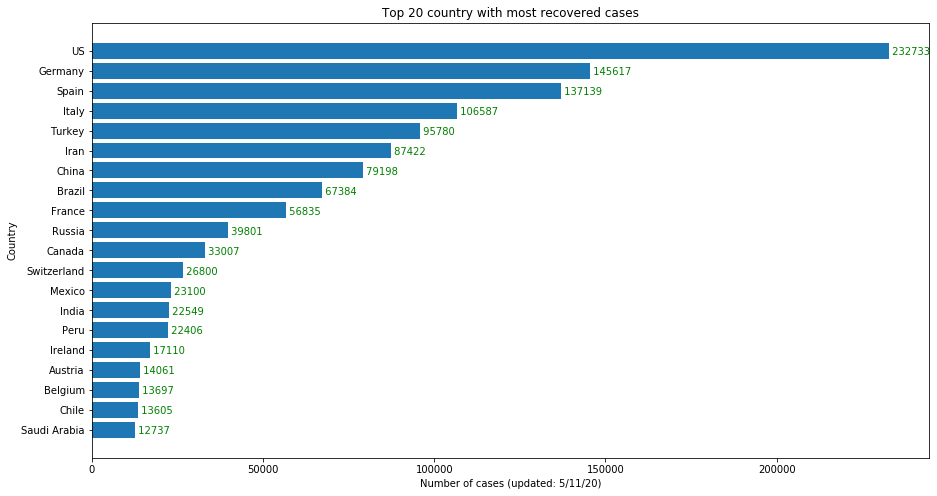

In [14]:
# Sum the amount of cases in different state group by country
df_recovered_country = df_recovered.groupby('Country/Region')[dates].sum().reset_index()
df_recovered_country = df_recovered_country.sort_values(by=df_recovered_country.columns[-1], ascending=False)

# Plot the chart for top 20 most recovered cases
plt.figure(figsize=(15,8))
plt.barh(df_recovered_country[df_recovered_country.columns[0]].iloc[:20][::-1], 
         df_recovered_country[df_recovered_country.columns[-1]].iloc[:20][::-1])
for i, v in enumerate(df_recovered_country[df_recovered_country.columns[-1]].iloc[:20][::-1]):
    plt.text(v, i-.2, ' '+str(v), color='green')
plt.title('Top 20 country with most recovered cases')
plt.ylabel('Country')
plt.xlabel(f'Number of cases (updated: {df_recovered_country.columns[-1]})')

In [41]:
# Aggregate the latest number for confirmed, death and recovered cases for each country
df_agg = df_confirmed_country.iloc[:,[0,-1]].rename(columns={'Country/Region':'country',dates[-1]:'confirmed'})
df_agg = df_agg.join(df_death_country.iloc[:,[0,-1]].set_index('Country/Region'), 
                     on='country').rename(columns={dates[-1]:'death'})
df_agg = df_agg.join(df_recovered_country.iloc[:,[0,-1]].set_index('Country/Region'), 
                     on='country').rename(columns={dates[-1]:'recovered'})
df_agg.head(2)

,country,confirmed,death,recovered
173,US,1347881,80682,232733
157,Spain,227436,26744,137139


In [51]:
# Calculate the current active cases and rate of death and recovered
df_agg['current_active'] = df_agg['confirmed'] - df_agg['death'] - df_agg['recovered']
df_agg['death_rate'] = round((df_agg['death'] / df_agg['confirmed']) * 100, 2)
df_agg['recovered_rate'] = round((df_agg['recovered'] / df_agg['confirmed']) * 100, 2)
df_agg.head(2)

,country,confirmed,death,recovered,death_rate,recovered_rate,current_active
123,Nicaragua,16,5,7,31.25,43.75,4
103,MS Zaandam,9,2,0,22.22,0.00,7


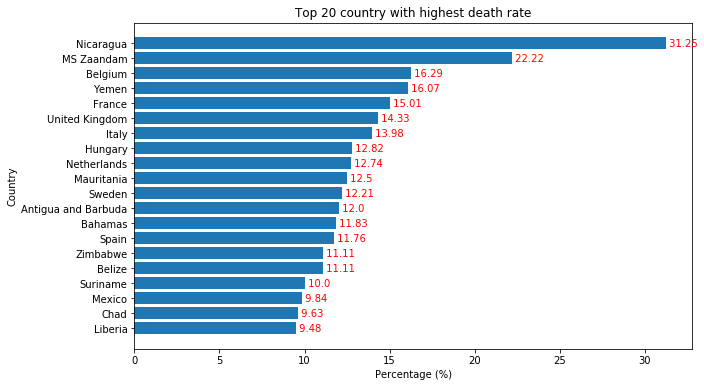

In [58]:
df_agg.sort_values(by='death_rate', inplace=True)

# Plot top 20 highest death rate
plt.figure(figsize=(10,6))
plt.barh(df_agg['country'].iloc[-20:], df_agg['death_rate'].iloc[-20:])
plt.title("Top 20 country with highest death rate")
plt.xlabel("Percentage (%)")
plt.ylabel("Country")

for i, v in enumerate(df_agg['death_rate'].iloc[-20:]):
    plt.text(v, i-.2, ' '+str(v), color='red')

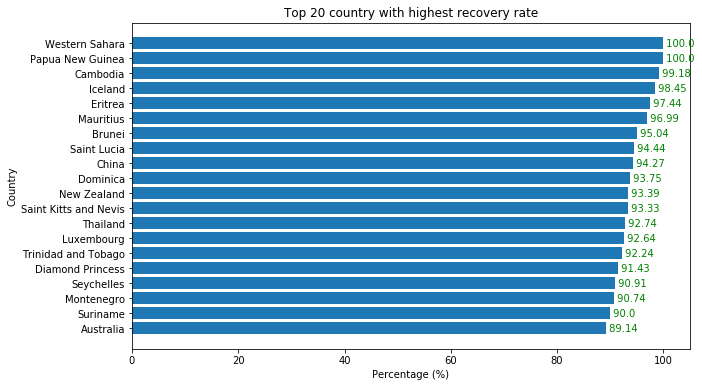

In [59]:
df_agg.sort_values(by='recovered_rate', inplace=True)

# Plot top 20 highest recovery rate
plt.figure(figsize=(10,6))
plt.barh(df_agg['country'].iloc[-20:], df_agg['recovered_rate'].iloc[-20:])
plt.title("Top 20 country with highest recovery rate")
plt.xlabel("Percentage (%)")
plt.ylabel("Country")

for i, v in enumerate(df_agg['recovered_rate'].iloc[-20:]):
    plt.text(v, i-.2, ' '+str(v), color='green')

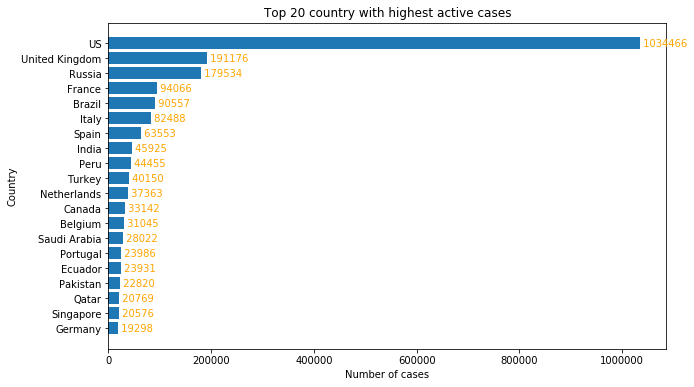

In [64]:
df_agg.sort_values(by='current_active', inplace=True)

# Plot top 20 highest active case
plt.figure(figsize=(10,6))
plt.barh(df_agg['country'].iloc[-20:], df_agg['current_active'].iloc[-20:])
plt.title("Top 20 country with highest active cases")
plt.xlabel("Number of cases")
plt.ylabel("Country")

for i, v in enumerate(df_agg['current_active'].iloc[-20:]):
    plt.text(v, i-.2, ' '+str(v), color='orange')

In [66]:
df_agg.sort_values(by='current_active', ascending=False, inplace=True)
df_agg.style.background_gradient(cmap='Reds')

,country,confirmed,death,recovered,death_rate,recovered_rate,current_active
173,US,1347881,80682,232733,5.99,17.27,1034466
177,United Kingdom,224332,32141,1015,14.33,0.45,191176
139,Russia,221344,2009,39801,0.91,17.98,179534
62,France,177547,26646,56835,15.01,32.01,94066
23,Brazil,169594,11653,67384,6.87,39.73,90557
85,Italy,219814,30739,106587,13.98,48.49,82488
157,Spain,227436,26744,137139,11.76,60.3,63553
79,India,70768,2294,22549,3.24,31.86,45925
133,Peru,68822,1961,22406,2.85,32.56,44455
172,Turkey,139771,3841,95780,2.75,68.53,40150


## Predictive Model

In [ ]:
dates = df_confirmed.iloc[:,4:].columns.tolist()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103],
 <a list of 104 Text xticklabel objects>)

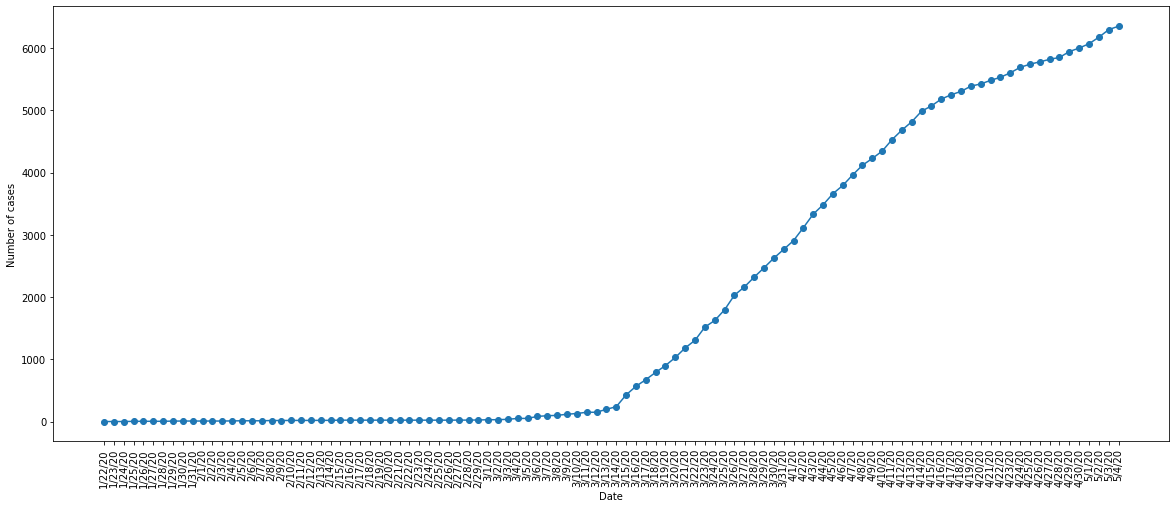

In [6]:
plt.figure(figsize=(20,8))
plt.plot(dates, df[df['Country/Region'] == 'Malaysia'].to_numpy()[0, 1:], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.xticks(rotation=90)

In [7]:
df[df['Country/Region'] == 'Malaysia'].to_numpy()[0, 1:]

array([0, 0, 0, 3, 4, 4, 4, 7, 8, 8, 8, 8, 8, 10, 12, 12, 12, 16, 16, 18,
       18, 18, 19, 19, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23,
       23, 25, 29, 29, 36, 50, 50, 83, 93, 99, 117, 129, 149, 149, 197,
       238, 428, 566, 673, 790, 900, 1030, 1183, 1306, 1518, 1624, 1796,
       2031, 2161, 2320, 2470, 2626, 2766, 2908, 3116, 3333, 3483, 3662,
       3793, 3963, 4119, 4228, 4346, 4530, 4683, 4817, 4987, 5072, 5182,
       5251, 5305, 5389, 5425, 5482, 5532, 5603, 5691, 5742, 5780, 5820,
       5851, 5945, 6002, 6071, 6176, 6298, 6353], dtype=object)

In [8]:
my_case_increament = df[df['Country/Region'] == 'Malaysia'].to_numpy()[0, 1:]
for i in reversed(range(len(my_case_increament))):
    my_case_increament[i] = max(my_case_increament[i] - my_case_increament[i-1], 0)
my_case_increament

array([0, 0, 0, 3, 1, 0, 0, 3, 1, 0, 0, 0, 0, 2, 2, 0, 0, 4, 0, 2, 0, 0,
       1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 4, 0, 7, 14, 0,
       33, 10, 6, 18, 12, 20, 0, 48, 41, 190, 138, 107, 117, 110, 130,
       153, 123, 212, 106, 172, 235, 130, 159, 150, 156, 140, 142, 208,
       217, 150, 179, 131, 170, 156, 109, 118, 184, 153, 134, 170, 85,
       110, 69, 54, 84, 36, 57, 50, 71, 88, 51, 38, 40, 31, 94, 57, 69,
       105, 122, 55], dtype=object)

In [13]:
in_data = keras.Input((20,1),dtype='float32')

# Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
# The returned output should be a batch of sequences.
X = keras.layers.LSTM(units=64)(in_data)
# Propagate X trough another LSTM layer with 128-dimensional hidden state
# The returned output should be a single hidden state, not a batch of sequences.
# X = keras.layers.LSTM(units=128)(X)
# Propagate X through a Dense layer with 5 units
X = keras.layers.Dense(1)(X)
# Add a softmax activation
X = keras.layers.Activation('relu')(X)

# Create Model instance which converts sentence_indices into X.
model = keras.models.Model(inputs=in_data, outputs=X)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Create training input for lstm
# train_x = []
# train_y = []
# for i in reversed(range(21, len(my_case_increament))):
#     train_x.append(my_case_increament[i-21:i-1])
#     train_y.append(my_case_increament[i])
# train_x = np.array(train_x).reshape(len(train_x), 20, 1).astype(float)
# train_y = np.array(train_y).astype(float)
my_cul = df[df['Country/Region'] == 'Malaysia'].to_numpy()[0, 1:]
train_x = [my_cul[i:i+20]for i in range(0, len(my_cul)-20,1)]
train_y = my_cul[20:]
train_x = np.array(train_x).reshape(len(train_x),20,1).astype(float)
train_y = np.array(train_y).reshape(len(train_y),1).astype(float)
print(train_x.shape, train_y.shape)


(84, 20, 1) (84, 1)


In [ ]:
model.fit(x=train_x, y=train_y, epochs=3000, batch_size=32)

Train on 84 samples
Epoch 1/3000
84/84 [==============================] - 2s 27ms/sample - loss: 11082376.0000
Epoch 2/3000
84/84 [==============================] - 0s 845us/sample - loss: 11081411.5238
Epoch 3/3000
84/84 [==============================] - 0s 690us/sample - loss: 11080834.2381
Epoch 4/3000
84/84 [==============================] - 0s 702us/sample - loss: 11080077.7143
Epoch 5/3000
84/84 [==============================] - 0s 690us/sample - loss: 11078965.0000
Epoch 6/3000
84/84 [==============================] - 0s 642us/sample - loss: 11078264.8095
Epoch 7/3000
84/84 [==============================] - 0s 702us/sample - loss: 11077710.5238
Epoch 8/3000
84/84 [==============================] - 0s 678us/sample - loss: 11077404.8571
Epoch 9/3000
84/84 [==============================] - 0s 750us/sample - loss: 11076856.6667
Epoch 10/3000
84/84 [==============================] - 0s 642us/sample - loss: 11075375.1429
Epoch 11/3000
84/84 [==============================] - 0s 70

84/84 [==============================] - 0s 642us/sample - loss: 10888872.2857
Epoch 176/3000
84/84 [==============================] - 0s 642us/sample - loss: 10888062.2381
Epoch 177/3000
84/84 [==============================] - 0s 702us/sample - loss: 10887206.3333
Epoch 178/3000
84/84 [==============================] - 0s 785us/sample - loss: 10886374.8571
Epoch 179/3000
84/84 [==============================] - 0s 797us/sample - loss: 10885556.1905
Epoch 180/3000
84/84 [==============================] - 0s 726us/sample - loss: 10884712.6667
Epoch 181/3000
84/84 [==============================] - 0s 761us/sample - loss: 10883880.8095
Epoch 182/3000
84/84 [==============================] - 0s 702us/sample - loss: 10883015.6190
Epoch 183/3000
84/84 [==============================] - 0s 809us/sample - loss: 10882214.3810
Epoch 184/3000
84/84 [==============================] - 0s 833us/sample - loss: 10881407.7619
Epoch 185/3000
84/84 [==============================] - 0s 726us/sample - l

84/84 [==============================] - 0s 761us/sample - loss: 10818816.1905
Epoch 263/3000
84/84 [==============================] - 0s 690us/sample - loss: 10818021.9048
Epoch 264/3000
84/84 [==============================] - 0s 761us/sample - loss: 10817253.6190
Epoch 265/3000
84/84 [==============================] - 0s 761us/sample - loss: 10816443.8095
Epoch 266/3000
84/84 [==============================] - 0s 654us/sample - loss: 10815662.3810
Epoch 267/3000
84/84 [==============================] - 0s 654us/sample - loss: 10814846.3810
Epoch 268/3000
84/84 [==============================] - 0s 654us/sample - loss: 10814083.5238
Epoch 269/3000
84/84 [==============================] - 0s 642us/sample - loss: 10813294.5714
Epoch 270/3000
84/84 [==============================] - 0s 642us/sample - loss: 10812508.0952
Epoch 271/3000
84/84 [==============================] - 0s 642us/sample - loss: 10811684.6667
Epoch 272/3000
84/84 [==============================] - 0s 654us/sample - l

84/84 [==============================] - 0s 654us/sample - loss: 10684486.0476
Epoch 436/3000
84/84 [==============================] - 0s 773us/sample - loss: 10683701.1429
Epoch 437/3000
84/84 [==============================] - 0s 702us/sample - loss: 10682935.2857
Epoch 438/3000
84/84 [==============================] - 0s 666us/sample - loss: 10682163.3810
Epoch 439/3000
84/84 [==============================] - 0s 642us/sample - loss: 10681421.4286
Epoch 440/3000
84/84 [==============================] - 0s 654us/sample - loss: 10680679.0000
Epoch 441/3000
84/84 [==============================] - 0s 631us/sample - loss: 10679904.0476
Epoch 442/3000
84/84 [==============================] - 0s 654us/sample - loss: 10679105.8571
Epoch 443/3000
84/84 [==============================] - 0s 702us/sample - loss: 10678378.1429
Epoch 444/3000
84/84 [==============================] - 0s 738us/sample - loss: 10677593.9048
Epoch 445/3000
84/84 [==============================] - 0s 678us/sample - l

84/84 [==============================] - 0s 738us/sample - loss: 10552280.0476
Epoch 610/3000
84/84 [==============================] - 0s 833us/sample - loss: 10551543.2857
Epoch 611/3000
84/84 [==============================] - 0s 702us/sample - loss: 10550771.1905
Epoch 612/3000
84/84 [==============================] - 0s 702us/sample - loss: 10550025.1429
Epoch 613/3000
84/84 [==============================] - 0s 1ms/sample - loss: 10549275.6667
Epoch 614/3000
84/84 [==============================] - 0s 642us/sample - loss: 10548517.8571
Epoch 615/3000
84/84 [==============================] - 0s 678us/sample - loss: 10547735.3333
Epoch 616/3000
84/84 [==============================] - 0s 643us/sample - loss: 10546989.5714
Epoch 617/3000
84/84 [==============================] - 0s 714us/sample - loss: 10546240.9048
Epoch 618/3000
84/84 [==============================] - 0s 869us/sample - loss: 10545501.9286
Epoch 619/3000
84/84 [==============================] - 0s 654us/sample - los

84/84 [==============================] - 0s 535us/sample - loss: 10422422.3810
Epoch 784/3000
84/84 [==============================] - 0s 547us/sample - loss: 10421707.2381
Epoch 785/3000
84/84 [==============================] - 0s 547us/sample - loss: 10420957.8095
Epoch 786/3000
84/84 [==============================] - 0s 535us/sample - loss: 10420248.9524
Epoch 787/3000
84/84 [==============================] - 0s 559us/sample - loss: 10419442.2381
Epoch 788/3000
84/84 [==============================] - 0s 595us/sample - loss: 10418744.5714
Epoch 789/3000
84/84 [==============================] - 0s 535us/sample - loss: 10417973.8095
Epoch 790/3000
84/84 [==============================] - 0s 547us/sample - loss: 10417255.1905
Epoch 791/3000
84/84 [==============================] - 0s 595us/sample - loss: 10416515.4286
Epoch 792/3000
84/84 [==============================] - 0s 535us/sample - loss: 10415777.1667
Epoch 793/3000
84/84 [==============================] - 0s 535us/sample - l

84/84 [==============================] - 0s 559us/sample - loss: 10294448.6190
Epoch 958/3000
84/84 [==============================] - 0s 559us/sample - loss: 10293714.7619
Epoch 959/3000
84/84 [==============================] - 0s 547us/sample - loss: 10292988.0476
Epoch 960/3000
84/84 [==============================] - 0s 571us/sample - loss: 10292275.7619
Epoch 961/3000
84/84 [==============================] - 0s 547us/sample - loss: 10291552.8095
Epoch 962/3000
84/84 [==============================] - 0s 547us/sample - loss: 10290820.1905
Epoch 963/3000
84/84 [==============================] - 0s 583us/sample - loss: 10290078.0952
Epoch 964/3000
84/84 [==============================] - 0s 559us/sample - loss: 10289331.3810
Epoch 965/3000
84/84 [==============================] - 0s 547us/sample - loss: 10288619.5238
Epoch 966/3000
84/84 [==============================] - 0s 535us/sample - loss: 10287871.1905
Epoch 967/3000
84/84 [==============================] - 0s 547us/sample - l

84/84 [==============================] - 0s 571us/sample - loss: 10168928.9048
Epoch 1130/3000
84/84 [==============================] - 0s 571us/sample - loss: 10168150.2381
Epoch 1131/3000
84/84 [==============================] - 0s 535us/sample - loss: 10167453.8095
Epoch 1132/3000
84/84 [==============================] - 0s 559us/sample - loss: 10166693.6190
Epoch 1133/3000
84/84 [==============================] - 0s 571us/sample - loss: 10166058.6429
Epoch 1134/3000
84/84 [==============================] - 0s 571us/sample - loss: 10165306.0476
Epoch 1135/3000
84/84 [==============================] - 0s 571us/sample - loss: 10164506.0000
Epoch 1136/3000
84/84 [==============================] - 0s 631us/sample - loss: 10163795.9048
Epoch 1137/3000
84/84 [==============================] - 0s 583us/sample - loss: 10163053.2381
Epoch 1138/3000
84/84 [==============================] - 0s 583us/sample - loss: 10162323.0714
Epoch 1139/3000
84/84 [==============================] - 0s 583us/

84/84 [==============================] - 0s 595us/sample - loss: 10045060.5714
Epoch 1302/3000
84/84 [==============================] - 0s 595us/sample - loss: 10044391.2857
Epoch 1303/3000
84/84 [==============================] - 0s 583us/sample - loss: 10043649.8571
Epoch 1304/3000
84/84 [==============================] - 0s 583us/sample - loss: 10042919.3810
Epoch 1305/3000
84/84 [==============================] - 0s 607us/sample - loss: 10042241.2381
Epoch 1306/3000
84/84 [==============================] - 0s 583us/sample - loss: 10041482.4762
Epoch 1307/3000
84/84 [==============================] - 0s 607us/sample - loss: 10040751.4762
Epoch 1308/3000
84/84 [==============================] - 0s 607us/sample - loss: 10040034.5714
Epoch 1309/3000
84/84 [==============================] - 0s 619us/sample - loss: 10039311.1429
Epoch 1310/3000
84/84 [==============================] - 0s 607us/sample - loss: 10038649.9048
Epoch 1311/3000
84/84 [==============================] - 0s 607us/

84/84 [==============================] - 0s 547us/sample - loss: 9921343.2381
Epoch 1475/3000
84/84 [==============================] - 0s 559us/sample - loss: 9920669.9048
Epoch 1476/3000
84/84 [==============================] - 0s 559us/sample - loss: 9919906.6667
Epoch 1477/3000
84/84 [==============================] - 0s 547us/sample - loss: 9919247.5000
Epoch 1478/3000
84/84 [==============================] - 0s 547us/sample - loss: 9918520.2857
Epoch 1479/3000
84/84 [==============================] - 0s 535us/sample - loss: 9917822.0000
Epoch 1480/3000
84/84 [==============================] - 0s 547us/sample - loss: 9917121.1429
Epoch 1481/3000
84/84 [==============================] - 0s 547us/sample - loss: 9916385.3333
Epoch 1482/3000
84/84 [==============================] - 0s 571us/sample - loss: 9915685.3095
Epoch 1483/3000
84/84 [==============================] - 0s 690us/sample - loss: 9914969.8571
Epoch 1484/3000
84/84 [==============================] - 0s 631us/sample - l

84/84 [==============================] - 0s 559us/sample - loss: 9798017.3810
Epoch 1649/3000
84/84 [==============================] - 0s 559us/sample - loss: 9797333.3095
Epoch 1650/3000
84/84 [==============================] - 0s 535us/sample - loss: 9796600.9524
Epoch 1651/3000
84/84 [==============================] - 0s 571us/sample - loss: 9795901.8571
Epoch 1652/3000
84/84 [==============================] - 0s 547us/sample - loss: 9795157.0476
Epoch 1653/3000
84/84 [==============================] - 0s 559us/sample - loss: 9794493.0952
Epoch 1654/3000
84/84 [==============================] - 0s 559us/sample - loss: 9793777.5000
Epoch 1655/3000
84/84 [==============================] - 0s 547us/sample - loss: 9793039.5714
Epoch 1656/3000
84/84 [==============================] - 0s 547us/sample - loss: 9792363.8095
Epoch 1657/3000
84/84 [==============================] - 0s 547us/sample - loss: 9791707.1905
Epoch 1658/3000
84/84 [==============================] - 0s 583us/sample - l

84/84 [==============================] - 0s 583us/sample - loss: 9675802.4286
Epoch 1823/3000
84/84 [==============================] - 0s 547us/sample - loss: 9675108.5476
Epoch 1824/3000
84/84 [==============================] - 0s 535us/sample - loss: 9674445.6905
Epoch 1825/3000
84/84 [==============================] - 0s 559us/sample - loss: 9673696.7619
Epoch 1826/3000
84/84 [==============================] - 0s 559us/sample - loss: 9672983.9048
Epoch 1827/3000
84/84 [==============================] - 0s 583us/sample - loss: 9672304.7619
Epoch 1828/3000
84/84 [==============================] - 0s 571us/sample - loss: 9671644.8095
Epoch 1829/3000
84/84 [==============================] - 0s 547us/sample - loss: 9670896.6667
Epoch 1830/3000
84/84 [==============================] - 0s 547us/sample - loss: 9670197.7143
Epoch 1831/3000
84/84 [==============================] - 0s 547us/sample - loss: 9669494.1905
Epoch 1832/3000
84/84 [==============================] - 0s 559us/sample - l

84/84 [==============================] - 0s 559us/sample - loss: 9554325.1429
Epoch 1997/3000
84/84 [==============================] - 0s 547us/sample - loss: 9553568.8571
Epoch 1998/3000
84/84 [==============================] - 0s 559us/sample - loss: 9552872.6667
Epoch 1999/3000
84/84 [==============================] - 0s 547us/sample - loss: 9552179.6190
Epoch 2000/3000
84/84 [==============================] - 0s 547us/sample - loss: 9551515.6429
Epoch 2001/3000
84/84 [==============================] - 0s 595us/sample - loss: 9550791.9524
Epoch 2002/3000
84/84 [==============================] - 0s 535us/sample - loss: 9550108.5000
Epoch 2003/3000
84/84 [==============================] - 0s 559us/sample - loss: 9549385.2381
Epoch 2004/3000
84/84 [==============================] - 0s 547us/sample - loss: 9548690.2857
Epoch 2005/3000
84/84 [==============================] - 0s 535us/sample - loss: 9547973.7143
Epoch 2006/3000
84/84 [==============================] - 0s 547us/sample - l

84/84 [==============================] - 0s 547us/sample - loss: 9434007.2619
Epoch 2171/3000
84/84 [==============================] - 0s 547us/sample - loss: 9433232.0952
Epoch 2172/3000
84/84 [==============================] - 0s 535us/sample - loss: 9432606.6190
Epoch 2173/3000
84/84 [==============================] - 0s 547us/sample - loss: 9431904.7619
Epoch 2174/3000
84/84 [==============================] - 0s 559us/sample - loss: 9431212.9524
Epoch 2175/3000
84/84 [==============================] - 0s 547us/sample - loss: 9430525.3095
Epoch 2176/3000
84/84 [==============================] - 0s 547us/sample - loss: 9429846.2381
Epoch 2177/3000
84/84 [==============================] - 0s 535us/sample - loss: 9429130.9524
Epoch 2178/3000
84/84 [==============================] - 0s 535us/sample - loss: 9428436.5238
Epoch 2179/3000
84/84 [==============================] - 0s 547us/sample - loss: 9427792.1667
Epoch 2180/3000
84/84 [==============================] - 0s 547us/sample - l

84/84 [==============================] - 0s 547us/sample - loss: 9314661.2857
Epoch 2345/3000
84/84 [==============================] - 0s 547us/sample - loss: 9313978.7619
Epoch 2346/3000
84/84 [==============================] - 0s 547us/sample - loss: 9313274.1905
Epoch 2347/3000
84/84 [==============================] - 0s 547us/sample - loss: 9312600.9048
Epoch 2348/3000
84/84 [==============================] - 0s 547us/sample - loss: 9311907.9524
Epoch 2349/3000
84/84 [==============================] - 0s 547us/sample - loss: 9311233.5238
Epoch 2350/3000
84/84 [==============================] - 0s 547us/sample - loss: 9310576.7381
Epoch 2351/3000
84/84 [==============================] - 0s 571us/sample - loss: 9309813.8095
Epoch 2352/3000
84/84 [==============================] - 0s 547us/sample - loss: 9309147.2857
Epoch 2353/3000
84/84 [==============================] - 0s 571us/sample - loss: 9308461.9524
Epoch 2354/3000
84/84 [==============================] - 0s 559us/sample - l

84/84 [==============================] - 0s 547us/sample - loss: 9196698.4762
Epoch 2519/3000
84/84 [==============================] - 0s 547us/sample - loss: 9195992.0952
Epoch 2520/3000
84/84 [==============================] - 0s 547us/sample - loss: 9195321.6190
Epoch 2521/3000
84/84 [==============================] - 0s 547us/sample - loss: 9194683.3810
Epoch 2522/3000
84/84 [==============================] - 0s 547us/sample - loss: 9193949.2857
Epoch 2523/3000
84/84 [==============================] - 0s 535us/sample - loss: 9193306.6667
Epoch 2524/3000
84/84 [==============================] - 0s 571us/sample - loss: 9192642.8810
Epoch 2525/3000
84/84 [==============================] - 0s 535us/sample - loss: 9191980.5000
Epoch 2526/3000
84/84 [==============================] - 0s 535us/sample - loss: 9191251.1429
Epoch 2527/3000
84/84 [==============================] - 0s 559us/sample - loss: 9190586.9524
Epoch 2528/3000
84/84 [==============================] - 0s 523us/sample - l

84/84 [==============================] - 0s 547us/sample - loss: 9099642.6667
Epoch 2693/3000
84/84 [==============================] - 0s 702us/sample - loss: 9078904.0238
Epoch 2694/3000
84/84 [==============================] - 0s 547us/sample - loss: 9078062.8095
Epoch 2695/3000
84/84 [==============================] - 0s 559us/sample - loss: 9077633.0952
Epoch 2696/3000
84/84 [==============================] - 0s 559us/sample - loss: 9076791.8095
Epoch 2697/3000
84/84 [==============================] - 0s 714us/sample - loss: 9075991.4286
Epoch 2698/3000
84/84 [==============================] - 0s 547us/sample - loss: 9075335.5238
Epoch 2699/3000
84/84 [==============================] - 0s 547us/sample - loss: 9077296.5476
Epoch 2700/3000
84/84 [==============================] - 0s 619us/sample - loss: 9074011.7143
Epoch 2701/3000
84/84 [==============================] - 0s 571us/sample - loss: 9073408.3810
Epoch 2702/3000
84/84 [==============================] - 0s 571us/sample - l

In [ ]:
y_pred = model1.predict(np.array(train_x).reshape(len(train_x),20,1).astype(float)).reshape(84)
y_pred = [round(y) for y in y_pred]

In [ ]:
plt.figure(figsize=(20,30))
plt.barh(dates, my_case_increament)
plt.barh(dates[21:], y_pred)
plt.xlabel('Number of new confirmed cases')
plt.ylabel('Date')
plt.title('Malaysia daily new confirmed cases')
for i, v in enumerate(my_case_increament):
    plt.text(v+2, i-.2 , str(v), color='blue')
    if(i > 20):
        plt.text(v+10, i - .2 , str(y_pred[i-21]), color='red')

In [157]:
def predict_new_case(lates_20_day_data, days = 7):
    # get last 20 days data
    data = lates_20_day_data.reshape(1,20,1).astype(float) 
    prediction = np.zeros((1,7,1))
    for i in range(days):
        prediction[0,i,0] = np.round(model.predict(data))
        data = np.append(data[0,i+1:], prediction[0,0:i+1]).reshape(1,20,1)
    return prediction

In [158]:
my_case_increament

array([0, 0, 0, 3, 1, 0, 0, 3, 1, 0, 0, 0, 0, 2, 2, 0, 0, 4, 0, 2, 0, 0,
       1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 4, 0, 7, 14, 0,
       33, 10, 6, 18, 12, 20, 0, 48, 41, 190, 138, 107, 117, 110, 130,
       153, 123, 212, 106, 172, 235, 130, 159, 150, 156, 140, 142, 208,
       217, 150, 179, 131, 170, 156, 109, 118, 184, 153, 134, 170, 85,
       110, 69, 54, 84, 36, 57, 50, 71, 88, 51, 38, 40, 31, 94, 57, 69,
       105, 122, 55], dtype=object)

In [159]:
predict_new_case(my_case_increament[-20:])

array([[[87.],
        [78.],
        [94.],
        [64.],
        [73.],
        [89.],
        [63.]]])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103],
 <a list of 104 Text xticklabel objects>)

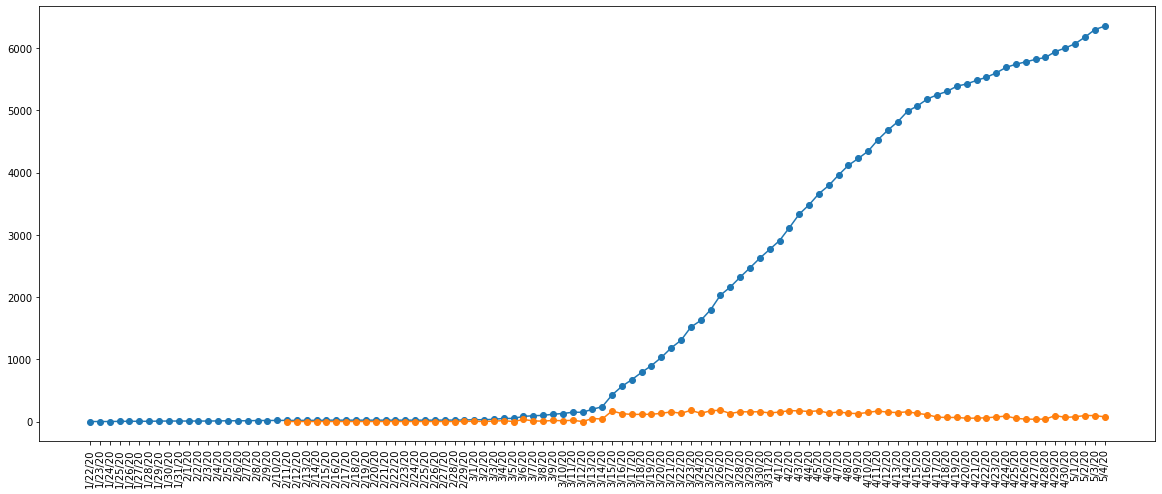

In [217]:
plt.figure(figsize=(20,8))
plt.plot(dates, df[df['Country/Region'] == 'Malaysia'].to_numpy()[0, 1:], marker='o', label='true_label')
plt.plot(dates[20:], y_pred, marker='o', label='true_label')
plt.xticks(rotation=90)

In [15]:
my_cul = df[df['Country/Region'] == 'Malaysia'].to_numpy()[0, 1:]

In [16]:
x_train_2 = [i for i in my_cul[:-1]]
y_train_2 = [i for i in my_cul[1:]]
print(len(x_train_2), len(y_train_2))
print(x_train_2[-5:], y_train_2[-5:])

103 103
[5945, 6002, 6071, 6176, 6298] [6002, 6071, 6176, 6298, 6353]


In [17]:
model_input = keras.Input(shape=(1,))

Dense_l1 = keras.layers.Dense(80,name="Dense_l1")(model_input)
LRelu_l1 = keras.layers.LeakyReLU(name = "LRelu_l1")(Dense_l1)

Dense_l2 = keras.layers.Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = keras.layers.LeakyReLU(name = "LRelu_l2")(Dense_l2)

Dense_l3 = keras.layers.Dense(80,name = "Dense_l3")(LRelu_l2)
LRelu_l3 = keras.layers.LeakyReLU(name = "LRelu_l3")(Dense_l3)

Dense_l4 = keras.layers.Dense(1,name="Dense_l4")(LRelu_l3)
LRelu_l4 = keras.layers.LeakyReLU(name = "Output")(Dense_l4
                                     )
model = keras.models.Model(inputs=model_input, outputs=LRelu_l4)
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['accuracy', 'mse'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l3 (LeakyReLU)         (None, 80)                0   

In [18]:
hist = model.fit(x=np.array(x_train_2).reshape(len(x_train_2),1), y=np.array(y_train_2).reshape(len(y_train_2),1), epochs=1000, validation_split=.1)

Train on 92 samples, validate on 11 samples
Epoch 1/1000
92/92 [==============================] - 1s 7ms/sample - loss: 6305957.6739 - accuracy: 0.0217 - mse: 6305957.5000 - val_loss: 32037288.0000 - val_accuracy: 0.0000e+00 - val_mse: 32037288.0000
Epoch 2/1000
92/92 [==============================] - 0s 304us/sample - loss: 4268286.0217 - accuracy: 0.0217 - mse: 4268286.0000 - val_loss: 18345946.0000 - val_accuracy: 0.0000e+00 - val_mse: 18345946.0000
Epoch 3/1000
92/92 [==============================] - 0s 293us/sample - loss: 2424102.4457 - accuracy: 0.0217 - mse: 2424102.5000 - val_loss: 8408471.0000 - val_accuracy: 0.0000e+00 - val_mse: 8408471.0000
Epoch 4/1000
92/92 [==============================] - 0s 326us/sample - loss: 1030893.0571 - accuracy: 0.0217 - mse: 1030893.0625 - val_loss: 2134418.5000 - val_accuracy: 0.0000e+00 - val_mse: 2134418.5000
Epoch 5/1000
92/92 [==============================] - 0s 348us/sample - loss: 217077.1364 - accuracy: 0.0217 - mse: 217077.1562 - 

92/92 [==============================] - 0s 315us/sample - loss: 3834.1067 - accuracy: 0.0217 - mse: 3834.1067 - val_loss: 13637.6475 - val_accuracy: 0.0000e+00 - val_mse: 13637.6475
Epoch 43/1000
92/92 [==============================] - 0s 326us/sample - loss: 3841.2164 - accuracy: 0.0217 - mse: 3841.2163 - val_loss: 14589.0537 - val_accuracy: 0.0000e+00 - val_mse: 14589.0537
Epoch 44/1000
92/92 [==============================] - 0s 326us/sample - loss: 3846.0747 - accuracy: 0.0217 - mse: 3846.0747 - val_loss: 14545.9600 - val_accuracy: 0.0000e+00 - val_mse: 14545.9600
Epoch 45/1000
92/92 [==============================] - 0s 304us/sample - loss: 3845.6987 - accuracy: 0.0217 - mse: 3845.6987 - val_loss: 13603.7627 - val_accuracy: 0.0000e+00 - val_mse: 13603.7627
Epoch 46/1000
92/92 [==============================] - 0s 315us/sample - loss: 3835.0409 - accuracy: 0.0217 - mse: 3835.0408 - val_loss: 11771.3203 - val_accuracy: 0.0000e+00 - val_mse: 11771.3203
Epoch 47/1000
92/92 [========

Epoch 124/1000
92/92 [==============================] - 0s 337us/sample - loss: 3858.4327 - accuracy: 0.0000e+00 - mse: 3858.4329 - val_loss: 12674.1309 - val_accuracy: 0.0000e+00 - val_mse: 12674.1309
Epoch 125/1000
92/92 [==============================] - 0s 348us/sample - loss: 3795.7489 - accuracy: 0.0000e+00 - mse: 3795.7490 - val_loss: 9522.3438 - val_accuracy: 0.0000e+00 - val_mse: 9522.3438
Epoch 126/1000
92/92 [==============================] - 0s 315us/sample - loss: 3950.8143 - accuracy: 0.0000e+00 - mse: 3950.8145 - val_loss: 8075.0703 - val_accuracy: 0.0000e+00 - val_mse: 8075.0703
Epoch 127/1000
92/92 [==============================] - 0s 315us/sample - loss: 3878.4534 - accuracy: 0.0000e+00 - mse: 3878.4534 - val_loss: 11292.4834 - val_accuracy: 0.0000e+00 - val_mse: 11292.4834
Epoch 128/1000
92/92 [==============================] - 0s 337us/sample - loss: 3909.0877 - accuracy: 0.0000e+00 - mse: 3909.0876 - val_loss: 19034.9922 - val_accuracy: 0.0000e+00 - val_mse: 19034

Epoch 165/1000
92/92 [==============================] - 0s 326us/sample - loss: 3809.8775 - accuracy: 0.0000e+00 - mse: 3809.8777 - val_loss: 12755.7979 - val_accuracy: 0.0000e+00 - val_mse: 12755.7979
Epoch 166/1000
92/92 [==============================] - 0s 358us/sample - loss: 3815.6049 - accuracy: 0.0000e+00 - mse: 3815.6050 - val_loss: 12198.8271 - val_accuracy: 0.0000e+00 - val_mse: 12198.8271
Epoch 167/1000
92/92 [==============================] - 0s 348us/sample - loss: 3909.7798 - accuracy: 0.0000e+00 - mse: 3909.7798 - val_loss: 15459.2979 - val_accuracy: 0.0000e+00 - val_mse: 15459.2979
Epoch 168/1000
92/92 [==============================] - 0s 326us/sample - loss: 3802.4320 - accuracy: 0.0000e+00 - mse: 3802.4316 - val_loss: 12793.2158 - val_accuracy: 0.0000e+00 - val_mse: 12793.2158
Epoch 169/1000
92/92 [==============================] - 0s 272us/sample - loss: 3925.0618 - accuracy: 0.0000e+00 - mse: 3925.0618 - val_loss: 8814.6465 - val_accuracy: 0.0000e+00 - val_mse: 88

KeyboardInterrupt: 

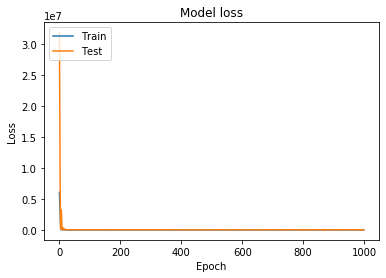

In [193]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

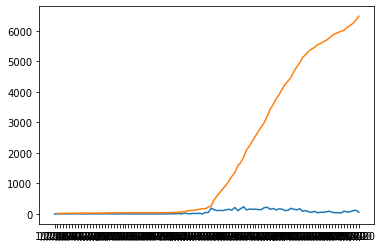

In [194]:
plt.plot(dates,my_case_increament)
plt.plot(dates[1:], model.predict(np.array(x_train_2).reshape(len(x_train_2),1)))